In [ ]:
#import base modules
import re
import time
#import installed modules
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns

# Predictive Practical Analytics Seminar 2021 - Data Manipulation in Python

## Import Data

### Winter is Coming

#### Source of data Links:

Game of Thrones mortality/survival dataset:
https://figshare.com/articles/dataset/Game_of_Thrones_mortality_and_survival_dataset/8259680/1

Biomedical research article using the dataset:
https://injepijournal.biomedcentral.com/articles/10.1186/s40621-018-0174-7

In [ ]:
df_got = pd.read_csv('../data/character_data_S01-S08.csv')
df_episode = pd.read_csv('../data/episode_data.csv')

## Understanding the Data

### head()

Much like in R, head(n) returns the top n rows of data in a dataframe, defaulting to n = 5. The main difference is in syntax style between the two languages. The below example would return 10 rows of data.

R: `head(df,10)`

Python (pandas): `df.head(10)`

In [ ]:
display(df_got.head())
display(df_episode.head())

,id,name,sex,religion,occupation,social_status,allegiance_last,allegiance_switched,intro_season,intro_episode,...,dth_description,icd10_dx_code,icd10_dx_text,icd10_cause_code,icd10_cause_text,icd10_place_code,icd10_place_text,top_location,geo_location,time_of_day
0,100,Waymar Royce,1,9,2,2,3,1,1,1,...,Killed by a white walker in a forest,T14,Injury of unspecified body region,X99.0,Assault by knife,Y92.84,Forest,2.0,1.0,1.0
1,101,Gared Tuttle,1,9,2,2,3,1,1,1,...,Decapitation by a white walker in a forest,S18,Traumatic amputation at neck level,X99.0,Assault by knife,Y92.84,Forest,2.0,1.0,1.0
2,102,Will,1,9,2,2,3,1,1,1,...,Decapitation by Ned Stark (legal execution) in...,S18,Traumatic amputation at neck level,Y35.5,Legal execution,Y92.86,Other specified countryside,2.0,1.0,1.0
3,103,Irri,2,1,2,2,2,2,1,1,...,Strangled to death with a tassel by Doreah in ...,T71,Asphyxiation,X91,"Assault by hanging, strangulation and suffocation",Y92.0,Home,1.0,2.0,1.0
4,104,Jon Snow,1,4,2,1,3,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,season,episode_number,episode_name,gross_running_time,opening_credits_time,closing_credits_time,net_running_time,cumulative_net_running_time
0,1,1,"""Winter Is Coming""",3546,110,33,3403,3403
1,1,2,"""The Kingsroad""",3182,111,34,3037,6440
2,1,3,"""Lord Snow""",3294,96,27,3171,9611
3,1,4,"""Cripples, Bastards, and Broken Things""",3201,96,26,3079,12690
4,1,5,"""The Wolf and the Lion""",3123,101,24,2998,15688


### describe()

In [ ]:
df_got.describe()

,id,sex,religion,occupation,social_status,allegiance_last,allegiance_switched,intro_season,intro_episode,intro_time_sec,...,censor_time_hrs,exp_season,exp_episode,exp_time_sec,exp_time_hrs,featured_episode_count,prominence,top_location,geo_location,time_of_day
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,...,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,212.000000,212.000000,212.000000
mean,279.000000,1.292479,7.041783,2.551532,1.688022,5.587744,1.153203,3.487465,29.072423,87278.835655,...,46.922368,3.487465,26.350975,81643.732591,22.678914,7.805014,1.129215,2.377358,1.174528,2.509434
std,103.778611,0.455536,2.829599,2.389921,0.463947,2.923124,0.360686,2.254538,22.426672,68897.206765,...,19.873473,2.427550,23.275600,73265.393027,20.351597,11.981638,1.269363,2.362635,0.380462,2.778541
min,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.100000,1.000000,1.000000,8.000000,0.000000,1.000000,0.111100,1.000000,1.000000,1.000000
25%,189.500000,1.000000,4.000000,1.000000,1.000000,3.000000,1.000000,1.000000,9.000000,25348.000000,...,31.965000,1.000000,5.000000,14496.500000,4.030000,1.000000,0.333300,1.000000,1.000000,1.000000
50%,279.000000,1.000000,9.000000,2.000000,2.000000,7.000000,1.000000,3.000000,26.000000,77694.000000,...,52.910000,3.000000,20.000000,66551.000000,18.490000,3.000000,0.875000,2.000000,1.000000,1.000000
75%,368.500000,2.000000,9.000000,2.000000,2.000000,8.000000,1.000000,5.000000,49.000000,146960.000000,...,64.110000,6.000000,45.000000,144591.500000,40.165000,8.000000,1.171550,2.000000,1.000000,2.000000
max,458.000000,2.000000,9.000000,9.000000,2.000000,9.000000,2.000000,8.000000,73.000000,229649.000000,...,64.110000,8.000000,73.000000,230347.000000,63.990000,67.000000,7.342500,9.000000,2.000000,9.000000


### info()

In [ ]:
df_got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      359 non-null    int64  
 1   name                    359 non-null    object 
 2   sex                     359 non-null    int64  
 3   religion                359 non-null    int64  
 4   occupation              359 non-null    int64  
 5   social_status           359 non-null    int64  
 6   allegiance_last         359 non-null    int64  
 7   allegiance_switched     359 non-null    int64  
 8   intro_season            359 non-null    int64  
 9   intro_episode           359 non-null    int64  
 10  intro_time_sec          359 non-null    int64  
 11  intro_time_hrs          359 non-null    float64
 12  dth_flag                359 non-null    int64  
 13  dth_season              212 non-null    float64
 14  dth_episode             212 non-null    fl

## Filtering

We can use logical operations to define what to include in a filtered dataframe. For example `df['intro_season'] > 2` returns a Series with length the same as datatable rowcount of True/False. We can bracket in these True/False vectors and they will return only those rows that match. It appears redundant, but for the example above it's `df[df['intro_season'] > 2]`. df is referenced twice: the "inside" df creates the vector of True/False values, while the "outside" df returns only the 'True'values.

In [ ]:
print((df_got['intro_season'] > 2).shape)
print(df_got[df_got['intro_season'] > 2].shape)

(359,)
(206, 35)


There are lots of uses for filtering. As a Life Actuary, for example, I may want to only model on standard lives. Data cleanup always requires some filtering skills. You can even use regex to filter out using values in text fields!

## Data Munging

### The Importance of Vectorized Functions - Be Pythonic!

Being "pythonic" is often taken to mean writing clear, interpretable code which takes advantage of existing structures and operations in Python.

There are two structures that will help a Data Analyst/Scientist/Actuary manipulate data both readably and efficiently:

1. Built-in functions in packages such as pandas and numpy; these may even be compiled to C for speed above an interpreted language like Python
2. "lambda" functions that can be applied to "iterables" like lists and data frames
 
#### lambda?

A lambda function is an anonymous function called with the lambda keyword. For example `lambda x: x+1` adds 1 to the argument passed to it. Lambda functions can be used with functions like map(), filter(), or pandas.apply() in order to efficiently apply the function to an entire dataframe (or row/column), list, etc. It is more efficient and "cleaner" than a (non-pythonic) loop. The below example compares the time taken with a for loop vs. a lambda function vs. a bult-in functions 

In [ ]:
d1 = df_episode.copy()
t1 = time.process_time()
ind = 0
for i in d1['episode_name']:
    d1.loc[ind,'ep_name_1'] = re.sub("\"","",i)
    ind+=1
te = time.process_time()
print('Processing time - for loop approach: {:.3f} ms.'.format(1000*(te-t1)))

t1 = time.process_time()
d1['ep_name_2'] = d1['episode_name'].apply(lambda x: re.sub("\"","",x))
te = time.process_time()
print('Processing time - apply() approach: {:.3f} ms.'.format(1000*(te-t1)))

t1 = time.process_time()
d1['ep_name_3'] = d1['episode_name'].str.replace('"','')
te = time.process_time()
print('Processing time - built-in vectorized function [replace()] approach: {:.3f} ms.'.format(1000*(te-t1)))

t1 = time.process_time()
d1['ep_name_4'] = [re.sub("\"","",i) for i in d1['episode_name']]
te = time.process_time()
print('Processing time - list comprehension approach: {:.3f} ms.'.format(1000*(te-t1)))

t1 = time.process_time()
#d1['ep_name_5'] = pd.Series(map(lambda x: x.str.replace('"',''),d1['episode_name']))
d1['ep_name_5'] = pd.Series(map(re.sub,['"']*d1.shape[0],['']*d1.shape[0],d1['episode_name']))
te = time.process_time()
print('Processing time - Python\'s map() approach: {:.3f} ms.'.format( 1000*(te - t1)))

Processing time - for loop approach: 18.412 ms.
Processing time - apply() approach: 1.202 ms.
Processing time - built-in vectorized function [replace()] approach: 1.001 ms.
Processing time - list comprehension approach: 0.814 ms.
Processing time - Python's map() approach: 1.107 ms.


**Note:** The "winner" here may not be the fastest in all scenarios, but list comprehension and mapping are always fast!

A sample of the identical fields created under each process:

In [ ]:
d1.head()

,season,episode_number,episode_name,gross_running_time,opening_credits_time,closing_credits_time,net_running_time,cumulative_net_running_time,ep_name_1,ep_name_2,ep_name_3,ep_name_4,ep_name_5
0,1,1,"""Winter Is Coming""",3546,110,33,3403,3403,Winter Is Coming,Winter Is Coming,Winter Is Coming,Winter Is Coming,Winter Is Coming
1,1,2,"""The Kingsroad""",3182,111,34,3037,6440,The Kingsroad,The Kingsroad,The Kingsroad,The Kingsroad,The Kingsroad
2,1,3,"""Lord Snow""",3294,96,27,3171,9611,Lord Snow,Lord Snow,Lord Snow,Lord Snow,Lord Snow
3,1,4,"""Cripples, Bastards, and Broken Things""",3201,96,26,3079,12690,"Cripples, Bastards, and Broken Things","Cripples, Bastards, and Broken Things","Cripples, Bastards, and Broken Things","Cripples, Bastards, and Broken Things","Cripples, Bastards, and Broken Things"
4,1,5,"""The Wolf and the Lion""",3123,101,24,2998,15688,The Wolf and the Lion,The Wolf and the Lion,The Wolf and the Lion,The Wolf and the Lion,The Wolf and the Lion


### Variable Persistence

Since we created a copy of `df` called `d1` to operate on, we have two versions of this same data. Normally, this is fine, but for large datasets and limited compute/memory resources, we may want to remove our experimental `d1` with the keyword `del`. A keyword is similar to a function - all that matters for now is that it does not use a parenthesis. Function syntax: `print(object)`. Keyword syntax: `del object`. 

In [ ]:
del d1

Can we avoid creating copies? Are there even more efficient ways to do this?

### By Value vs. By Reference

When a developer refers to an object *by value*, they are talking about operating on the data contained within the object, but with no change to the object itself (like our `copy()` example above). When its referred *by reference*, this means we are operating on (and potentially changing) the object itself. See the below example for a simple data frame.

In [ ]:
temp = pd.DataFrame({'a':[1,2,3,4],'b':[100,200,300,400]})
tempByValue = temp.copy()
tempByReference = temp
tempByValue['newField'] = tempByValue['a']+tempByValue['b']
print('Changing the copy does not change the original. The copy:')
display(tempByValue)
print('      but the original is still: ')
display(temp)
tempByReference['newField'] = tempByReference['a']+tempByReference['b']
print('Changing the "by value" variable DOES change the original:')
print("   run: tempByReference['newField'] = tempByReference['a']+tempByReference['b']")
print("   changes temp even though tempByReference was operated on:")
display(temp)

Changing the copy does not change the original. The copy:


,a,b,newField
0,1,100,101
1,2,200,202
2,3,300,303
3,4,400,404


      but the original is still: 


,a,b
0,1,100
1,2,200
2,3,300
3,4,400


Changing the "by value" variable DOES change the original:
   run: tempByReference['newField'] = tempByReference['a']+tempByReference['b']
   changes temp even though tempByReference was operated on:


,a,b,newField
0,1,100,101
1,2,200,202
2,3,300,303
3,4,400,404


In [ ]:
del temp, tempByReference, tempByValue

#### inplace
pandas has a useful argument in many functions called `inplace`. If this == `True` the operation is performed by reference and the original table is altered. It defaults to `False`. Let's see how we could use this to do our efficient `replace()` above in one step

In [ ]:
df_episode['episode_name'].replace('"','',regex=True,inplace=True)
display(df_episode.head())

,season,episode_number,episode_name,gross_running_time,opening_credits_time,closing_credits_time,net_running_time,cumulative_net_running_time
0,1,1,Winter Is Coming,3546,110,33,3403,3403
1,1,2,The Kingsroad,3182,111,34,3037,6440
2,1,3,Lord Snow,3294,96,27,3171,9611
3,1,4,"Cripples, Bastards, and Broken Things",3201,96,26,3079,12690
4,1,5,The Wolf and the Lion,3123,101,24,2998,15688


## Merging

In pandas, the `merge()` function matches rows of one table with rows of another similar to SQL's `join` functon. We won't go into great depth, but just like in SQL, you can do inner (defaults), left, right, outer, and cross-joins. You can specify the fields to join by like in a `by` clause (just make sure your types are compatible).

### Merge Example

#### Problem:

We want to merge the character data with the episode data in order to get more fields that we might want to use in a model. 

#### What to merge on?

Identical fields could be named similarly in two different data sources. But for now, let's see if the two sets of column names have any in common (it will let us show off more Python!).

In [ ]:
list(set(df_got.columns) & set(df_episode.columns))

[]

Uh oh...an empty set. No worries, let's look at the columns in both fields with our human eyes:

In [ ]:
print(df_got.columns.tolist())
print('\n')
print(df_episode.columns.tolist())

['id', 'name', 'sex', 'religion', 'occupation', 'social_status', 'allegiance_last', 'allegiance_switched', 'intro_season', 'intro_episode', 'intro_time_sec', 'intro_time_hrs', 'dth_flag', 'dth_season', 'dth_episode', 'dth_time_sec', 'dth_time_hrs', 'censor_time_sec', 'censor_time_hrs', 'exp_season', 'exp_episode', 'exp_time_sec', 'exp_time_hrs', 'featured_episode_count', 'prominence', 'dth_description', 'icd10_dx_code', 'icd10_dx_text', 'icd10_cause_code', 'icd10_cause_text', 'icd10_place_code', 'icd10_place_text', 'top_location', 'geo_location', 'time_of_day']


['season', 'episode_number', 'episode_name', 'gross_running_time', 'opening_credits_time', 'closing_credits_time', 'net_running_time', 'cumulative_net_running_time']


hmmm...looks like a lot of fields having to do with an 'episode' in both sets. Let's use a regular expression (regex) to find all the fields in the characters dataset:

In [ ]:
list(filter(re.compile('(?i)episode').search,df_got.columns.tolist()))

['intro_episode', 'dth_episode', 'exp_episode', 'featured_episode_count']

#### Merge

Well - I didn't provide a data dictionary (on purpose), but this looks like the episode a character was introduced, the episode they died in, their exposure (in episodes), and how many episodes they were featured in. featured_episode_count is meaningless for our purposes. exp_episode is a count, not an individual episode. So the question is, if I eventually want to predict mortality, do I care more about the episode they were introduced in or the one they died in?

I *think* I care more about when they were introduced. In one sense, it doesn't matter (I could add both with a second join and some creative column renaming). But there's a modeling lesson here! Using the season of death would be **cheating**!

I can make up, without a computer, completely by hand, a perfect mortality model using season of death. Ready? Here it is:

```
if math.isnan(dth_episode):
  return True
else:
  return False
```

The same logic for 'cause of death' would apply - it sounds silly but be careful not to cheat!

Okay, so we'll merge by season as each episode is distinct. If, instead, each season had a season 1, 2, etc, we could merge on both fields. I will pass this agument as a list for those who want to see how it's done.

In [ ]:
df = df_got.merge(df_episode,left_on=['intro_episode'],right_on=['episode_number'])

I think that worked? Let's make sure we have the same row count in the new data frame. An inner join would drop non-matched rows.

In [ ]:
print("Original GOT df dimensions: " + str(df_got.shape))
print("Merged df dimensions: " + str(df.shape))

Original GOT df dimensions: (359, 35)
Merged df dimensions: (359, 43)


## EDA - Exploratory Data Analysis
Technically, we've already done some EDA, but now with our fully-merged set we are ready to look at it all.

### groupby()

In [ ]:
df.groupby('occupation').size()

occupation
1     96
2    221
9     42
dtype: int64

### Deriving New Columns

As you may have noticed above, you can create a new column by assigning a vector of values to the dataframe with the new column's name indicated, e.g. `df['new_name']= ...`.

We can even use our groupby skills above as part of it! Let's create a variable that compares each character's screen-time with the average for their gender. As Life Actuaries know, almost any mortality model will have to differentiate by gender! 

In [ ]:
print("Averages (mean) by sex: \n")
display(df.groupby('sex')[['exp_time_hrs']].mean())

df['sex_relative_exp_hrs'] = df['exp_time_hrs']/df.groupby('sex')[['exp_time_hrs']].transform('mean').iloc[:,0]
display(df[['name','sex','exp_time_hrs','sex_relative_exp_hrs']].head())
display(df[df['sex'] == 2][['name','sex','exp_time_hrs','sex_relative_exp_hrs']].head())

Averages (mean) by sex: 



,exp_time_hrs
sex,
1,21.183976
2,26.295238


,name,sex,exp_time_hrs,sex_relative_exp_hrs
0,Waymar Royce,1,0.10,0.004721
1,Gared Tuttle,1,0.11,0.005193
2,Will,1,0.19,0.008969
3,Irri,2,13.47,0.512260
4,Jon Snow,1,63.99,3.020679


,name,sex,exp_time_hrs,sex_relative_exp_hrs
3,Irri,2,13.47,0.512260
10,Catelyn Stark,2,24.34,0.925643
11,Mordane,2,7.63,0.290167
12,Sansa Stark,2,63.98,2.433140
13,Arya Stark,2,63.98,2.433140


## Training and Test Set

This will be a step taken in every modeling project. We want the model to learn real-world relationships, not the particular relationships in the particular dataset used for training. This is especially a problem with modern Machine Learning models as they can easily be 'perfect'. An unpenalized xgboost model could perfectly predict mortality based on Policy Number. But what if you asked that model to predict on a new Policy Number? That number is meaningless to a model that has never seen it. If the model learns the data itself, rather than the relationships underlying the data, that is called 'overfit.' 

How do we know if we've overfit? Well, if a model predicts very well on data it's seen but terribly on data that it has not, it is overfit. We'd want to evaluate our model choices on this unseen data. Therefore we need to hold a subset of all data aside in order to test against. This is called the 'test', 'validation', or 'holdout' set.

Of course, we are playing with a Game of Thrones example which might make this difficult - data is so sparse that if I hold out data, that data may be very informative. For now, suffice it to say that how much data to hold out and how to determine that set is something you may have to wrestle with.

For our example, we use truly random draws for the holdout set. This is simple and unbiased (as opposed to, say, holding out all females and assuming that females *should* behave like males from a mortality perspective). But there are other alternatives as well. For example, the most recent data points might be in the test set - this is to evaluate the model that performs best looking forward in time. We could also enhance our random approach by 'stratifying' to ensure equal representation by regressors or a target.

We will stratify by deaths (`dth_flag`) to accomplish this, reserving only 20% of data to prevent sparse training data. We will use all other variables as predictors (though we could easily use only the columns we want to).

In [ ]:
from sklearn.model_selection import train_test_split
# define target/regressors
y = df['dth_flag']
X = df.loc[:,df.columns != 'dth_flag']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify = y, random_state=42)
tr=X_train.shape[0]
te=X_test.shape[0]
print('Rows of training set ' + str(tr))
print('Rows of test set ' + str(te))
print('Actual test set percentage in result: {:.1%}'.format(te/(te+tr)))

Rows of training set 287
Rows of test set 72
Actual test set percentage in result: 20.1%


## Transforming and Encoding

### Transforming

For many types of models like linear models (including glms), k-nearest neighbors, support vector machines, neural networks, and many, many, more, it is important that numerical variables are on the same scale. Further, some of these model forms have a normal-distribution of predictors/response assumption. We can accommodate all of these cases by "transforming" the variable.

Transforming certainly makes sense conceptually. However, a Transformer is a group of classes in the sklearn package, which is a very useful Machine Learning package in Python.

#### Standard Scaling
The `StandardScaler()` deletes the mean from the data (to center at 0) and divides by the standard deviation. If we apply this to all numeric fields, all numeric fields will now have a mean of 0 and a standard deviation of 1.

#### Derive from Test Set
We did the train/test split before the transformations on purpose. We generally want to fit our transformers on the training set so that normal values are derived from this set's mean/variance (so the model remains agnostic to the test set). As this process returns a transformer object, we can re-use this to do the same thing for the test set. We can also make this part of a 'pipeline' (more later).

In [ ]:
from sklearn.preprocessing import StandardScaler
#identify numeric fields
fieldTypeInfo = pd.DataFrame(dict(X_train.dtypes).items(), 
                             columns=['fieldName', 'dataType'])
unwantedFieldNames = ['id','name','dth_description','episode_name'] + df.filter(regex=('icd10.*')).columns.tolist()
categoricalAsNumbersFieldNames = ['sex','religion','occupation','social_status','allegiance_last', 'allegiance_switched']
categoricalFieldNames = list(set(fieldTypeInfo[fieldTypeInfo['dataType']=='object']['fieldName'].tolist() + \
  categoricalAsNumbersFieldNames) - set(unwantedFieldNames))
numericFieldNames = list(set(list(fieldTypeInfo.loc[(fieldTypeInfo['dataType']=='int64') | (fieldTypeInfo['dataType']=='float64'),
                                      'fieldName'])) - set(unwantedFieldNames) - set(categoricalFieldNames))
scaler = StandardScaler()
X_train_numeric_scaled = pd.DataFrame(scaler.fit_transform(X_train[numericFieldNames]),columns = numericFieldNames)
print('\nMean of data through standard scaler    : ', scaler.mean_)
print('St. Dev of data through standard scaler : ', scaler.scale_)
display(X_train_numeric_scaled.head())


Mean of data through standard scaler    :  [3.41408284e+01 4.47928994e+00 8.65404425e+04 7.43902439e+00
 1.12101045e+02 2.60418118e+01 8.07268885e+04 3.15603833e+03
 2.40236686e+00 4.64626481e+01 3.47386760e+00 2.24241812e+01
 3.45296167e+00 9.86501087e-01 4.05384615e+01 3.30796864e+03
 2.88397213e+01 3.97003484e+01 2.58579882e+00 1.15976331e+00
 1.67266331e+05 2.40391986e+01 2.88397213e+01 1.22905544e+05
 1.09440836e+00 3.47386760e+00 8.83211150e+04]
St. Dev of data through standard scaler :  [1.76651529e+01 2.17867219e+00 6.90057060e+04 1.16912491e+01
 1.15000484e+01 2.35498950e+01 7.41978716e+04 4.01616883e+02
 2.39407436e+00 2.00300443e+01 2.25357170e+00 2.06105349e+01
 2.45596407e+00 9.19109751e-01 2.06804370e+01 4.12699926e+02
 2.24696952e+01 1.24506314e+01 2.83156962e+00 3.66386404e-01
 7.21105363e+04 1.91682556e+01 2.24696952e+01 6.35953339e+04
 1.23276659e+00 2.25357170e+00 6.90608305e+04]


,dth_time_hrs,dth_season,intro_time_sec,featured_episode_count,opening_credits_time,exp_episode,exp_time_sec,net_running_time,top_location,censor_time_hrs,...,closing_credits_time,time_of_day,geo_location,censor_time_sec,intro_time_hrs,episode_number,dth_time_sec,prominence,season,cumulative_net_running_time
0,NaN,NaN,-0.300735,-0.123086,0.686863,1.102263,1.135964,-0.079773,NaN,0.881044,...,0.104384,NaN,NaN,0.881059,-0.300977,-0.304398,NaN,-0.326184,-0.210274,-0.306485
1,NaN,NaN,0.877167,-0.550756,0.339038,-0.044238,0.040488,-0.764506,NaN,0.881044,...,0.586288,NaN,NaN,0.881059,0.877013,0.897221,NaN,-0.757977,0.677206,0.873779
2,1.554426,1.615989,-0.331935,2.614004,0.078170,1.059800,1.043131,-0.420894,-0.168068,0.755732,...,-0.136567,-0.560042,-0.436051,0.755682,-0.331757,-0.348902,1.554414,2.738711,-0.210274,-0.351721
3,-0.600098,-0.678987,-0.058915,-0.550756,-0.356611,-1.063351,-1.057226,-0.142022,2.755818,-1.144413,...,-0.297202,2.265246,2.293307,-1.144206,-0.058910,-0.037371,-0.599864,-0.076583,-0.210274,-0.043167
4,NaN,NaN,0.308200,-0.550756,-0.356611,0.507781,0.569640,-0.956231,NaN,0.881044,...,-0.216884,NaN,NaN,0.881059,0.308364,0.318664,NaN,-0.781014,0.233466,0.306322


### Encoding

Encoding is a special group of transformers often used to process categorical variables. A category, expressed as a number or string, causes problems for a model. A string is meaningless, and a number implies order and (for many model) the unique difference between each class.

One common method is "one-hot" or "dummy" encoding which changes a factor with n levels into n columns of 0/1. This is problematic for linear models (you don't want the ability to calculate one variable as a linear combination of variables). Fortunately, an option exists to drop a "base level" so that we are left with n-1 columns.

Example:

| Gender | 
| --- |
| M | 
| F |
| F |

Without dropping one level:

| Gender==M | Gender==F |
| --- | --- |
| 1 | 0 |
| 0 | 1 |
| 0 | 1 |

With dropped level:

| Gender==M | 
| --- |
| 1 | 
| 0 |
| 0 |

We will now one-hot encode our categorical features. Recall that these are stored as integers (the data dictionary would say, for example, whether family==3 are the Lannisters, Baratheons, etc.). This, too, is a type of encoding, but not suited for this purpose. If (say) the families were ordered by increasing/decreasing mortality, then this sort of encoding would be useful for certain model forms.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoderDrop = OneHotEncoder(drop='first')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categoricalFieldNames]).toarray(),
                              columns=encoder.get_feature_names(categoricalFieldNames))
display(X_train_encoded.head())
X_train_encoded_drop = pd.DataFrame(encoderDrop.fit_transform(X_train[categoricalFieldNames]).toarray(),
                              columns=encoderDrop.get_feature_names(categoricalFieldNames))
display(X_train_encoded_drop.head())

,sex_1,sex_2,allegiance_last_1,allegiance_last_2,allegiance_last_3,allegiance_last_4,allegiance_last_5,allegiance_last_6,allegiance_last_7,allegiance_last_8,...,religion_1,religion_2,religion_3,religion_4,religion_5,religion_6,religion_7,religion_9,social_status_1,social_status_2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


,sex_2,allegiance_last_2,allegiance_last_3,allegiance_last_4,allegiance_last_5,allegiance_last_6,allegiance_last_7,allegiance_last_8,allegiance_last_9,allegiance_switched_2,occupation_2,occupation_9,religion_2,religion_3,religion_4,religion_5,religion_6,religion_7,religion_9,social_status_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## Pipeline
A `Pipeline` is an advanced but useful sklearn class. It essentially allows you to define a series of transforms and estimators/regressors (models). This allows you to cross-validate all steps at once. A grid search will search over the entire pipeline's hyperparameter space.

Below we will set up the above two steps as a pipeline. Note that I am repeating the above with all columns (with certain exclusions), typically you would choose to do this with just the variables you want to use as predictors.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(
    [
      ("os",OneHotEncoder(drop='first'),[c for c in categoricalFieldNames]),
      ("ss",StandardScaler(), [n for n in numericFieldNames])
    ])
transformed_data = transformer.fit_transform(X_train[categoricalFieldNames + numericFieldNames])
display(transformed_data)
print('Dimensions of test data'+str(transformed_data.shape))
pipeline = Pipeline(steps=[('transformer',transformer)])
print('\nComparison when the pipleine is used for fit/predict:')
display(pipeline.fit_transform(X_train))
print("\nNow the same pipeline can be used for the test set:")
display(pipeline.fit_transform(X_test))

array([[ 0.        ,  0.        ,  0.        , ..., -0.3261837 ,
        -0.21027403, -0.30648509],
       [ 1.        ,  0.        ,  0.        , ..., -0.75797671,
         0.67720606,  0.87377873],
       [ 1.        ,  1.        ,  0.        , ...,  2.73871118,
        -0.21027403, -0.35172057],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.16677256,
        -1.09775411, -1.22961329],
       [ 0.        ,  0.        ,  0.        , ..., -0.63159431,
         1.1209461 ,  1.13637332],
       [ 0.        ,  0.        ,  0.        , ..., -0.33153751,
        -0.21027403, -0.13399947]])

Dimensions of test data(287, 47)

Comparison when the pipleine is used for fit/predict:


array([[ 0.        ,  0.        ,  0.        , ..., -0.3261837 ,
        -0.21027403, -0.30648509],
       [ 1.        ,  0.        ,  0.        , ..., -0.75797671,
         0.67720606,  0.87377873],
       [ 1.        ,  1.        ,  0.        , ...,  2.73871118,
        -0.21027403, -0.35172057],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.16677256,
        -1.09775411, -1.22961329],
       [ 0.        ,  0.        ,  0.        , ..., -0.63159431,
         1.1209461 ,  1.13637332],
       [ 0.        ,  0.        ,  0.        , ..., -0.33153751,
        -0.21027403, -0.13399947]])


Now the same pipeline can be used for the test set:


array([[ 0.        ,  1.        ,  0.        , ...,  2.08420411,
        -0.24161232, -0.23127839],
       [ 0.        ,  0.        ,  0.        , ..., -0.64279241,
         1.0965482 ,  0.96951848],
       [ 0.        ,  0.        ,  0.        , ..., -0.70707475,
         1.0965482 ,  1.01147769],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.81677943,
        -0.24161232, -0.05487874],
       [ 0.        ,  0.        ,  0.        , ...,  2.24278641,
        -1.13371933, -1.30330897],
       [ 0.        ,  0.        ,  0.        , ...,  0.5939048 ,
        -1.13371933, -0.98512934]])

## Plotting

### Violin Plot

<AxesSubplot:xlabel='religion', ylabel='exp_time_hrs'>

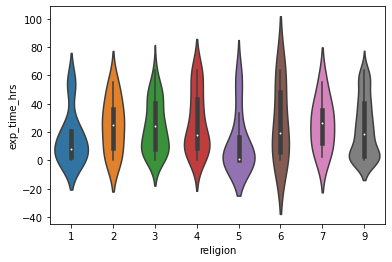

In [ ]:
sns.violinplot(data=df, x='religion',y='exp_time_hrs')

<AxesSubplot:xlabel='religion', ylabel='exp_time_hrs'>

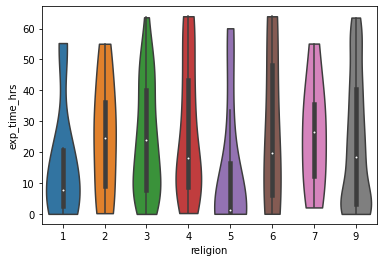

In [ ]:
sns.violinplot(data=df, x='religion',y='exp_time_hrs',cut=0)